In [1]:
import torch
from torch import nn
#nn contains all the building blocks for nerual networks
import matplotlib.pyplot as plt

#check pyTorch version
torch.__version__

'2.0.1+cu118'

#Data preparing and loading
Machine learning has 2 parts ->
1. Get data into numerical representation
2. Fit the data to model to learn patterns

* linear regresssion to make a straight line with known parameters

In [2]:
#create known parameters
weight = 0.7
bias = 0.3

# creating data
start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X),len(y)

(50, 50)

In [4]:
#spliting data into training and testing data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [39]:
#visualization

def plot_pred(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))

    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

    #plot test data in blue
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

    #plot predictions
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    #show the legend
    plt.legend(prop={"size" : 14})

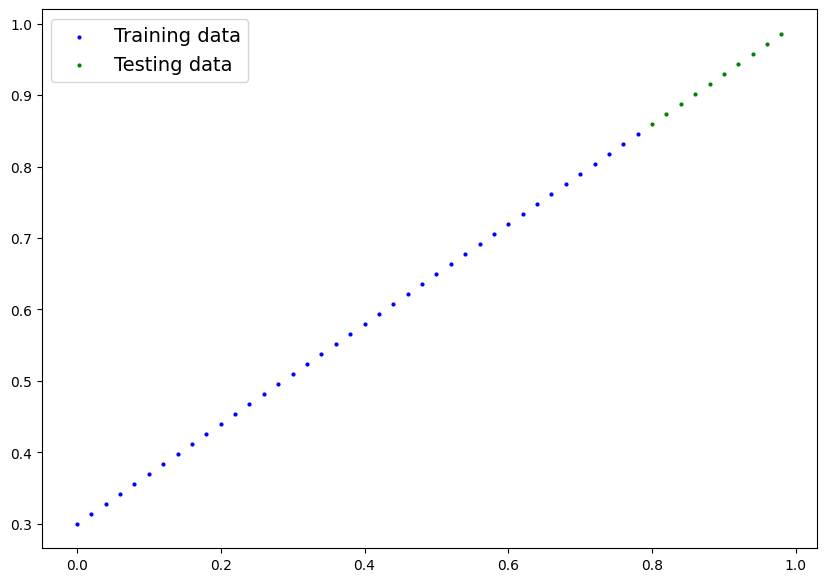

In [6]:
plot_pred()

#Buidling pytorch model


In [7]:
#Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    #method to define the computation in the model
    #forward method needs to be overrided
    def forward(self,x: torch.Tensor) -> torch.Tensor :
        return self.weights  * x + self.bias

In [8]:
#setting manuals seed to reproduce the results
torch.manual_seed(49)

#creating an instance of the model
model=LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([-2.0157], requires_grad=True),
 Parameter containing:
 tensor([2.0106], requires_grad=True)]

In [9]:
model.state_dict()

OrderedDict([('weights', tensor([-2.0157])), ('bias', tensor([2.0106]))])

In [10]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [11]:
#Making predictions with model

with torch.inference_mode(): #in older version torch.no_grad() is used to be written
    y_pred = model(X_test)

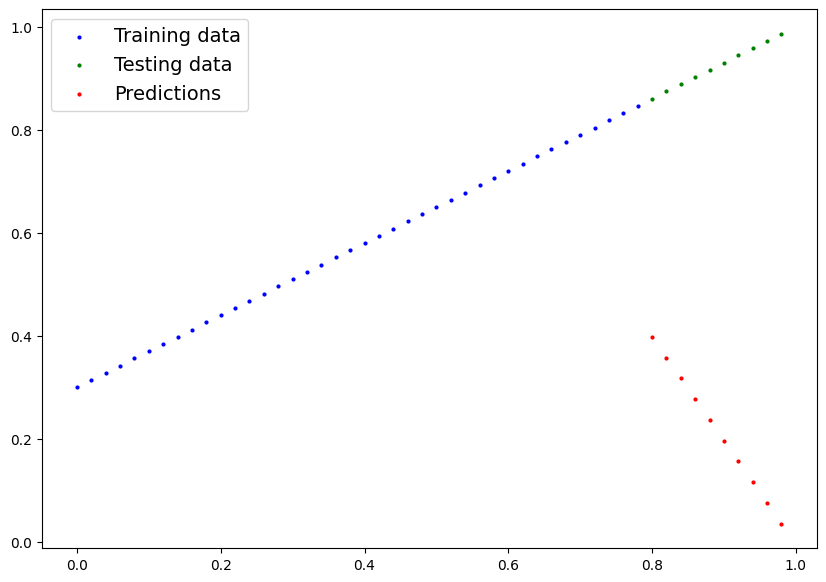

In [12]:
plot_pred(predictions=y_pred)

#Training a model

In [13]:
#create the loss function
loss_fn = nn.L1Loss()


#creat the optimizer

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [14]:
model.state_dict()

OrderedDict([('weights', tensor([-2.0157])), ('bias', tensor([2.0106]))])

In [15]:
#an epoch is a one loop through data
epochs = 300

#Tracking experiments
epoch_count=[]
loss_values=[]
test_loss_values=[]

## Training
for epoch in range(epochs):

    model.train() # sets all parameters that require gradient


    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred,y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()


    #Testing
    model.eval() # turn off different settings not needed for evalution/testing
    with torch.inference_mode():
        # 1. Do forward pass
        test_pred = model(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)


    if epoch % 10 == 0 :
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")
        print(model.state_dict())

Epoch : 0 | Loss : 0.7384690046310425 | Test loss : 0.7133610248565674
OrderedDict([('weights', tensor([-2.0168])), ('bias', tensor([2.0046]))])
Epoch : 10 | Loss : 0.7048241496086121 | Test loss : 0.7781400084495544
OrderedDict([('weights', tensor([-2.0255])), ('bias', tensor([1.9476]))])
Epoch : 20 | Loss : 0.6776574850082397 | Test loss : 0.8344452977180481
OrderedDict([('weights', tensor([-2.0309])), ('bias', tensor([1.8961]))])
Epoch : 30 | Loss : 0.6555935144424438 | Test loss : 0.883143424987793
OrderedDict([('weights', tensor([-2.0334])), ('bias', tensor([1.8496]))])
Epoch : 40 | Loss : 0.637226402759552 | Test loss : 0.9258216023445129
OrderedDict([('weights', tensor([-2.0336])), ('bias', tensor([1.8071]))])
Epoch : 50 | Loss : 0.6216011047363281 | Test loss : 0.9632730484008789
OrderedDict([('weights', tensor([-2.0318])), ('bias', tensor([1.7681]))])
Epoch : 60 | Loss : 0.609199047088623 | Test loss : 0.9948013424873352
OrderedDict([('weights', tensor([-2.0279])), ('bias', te

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

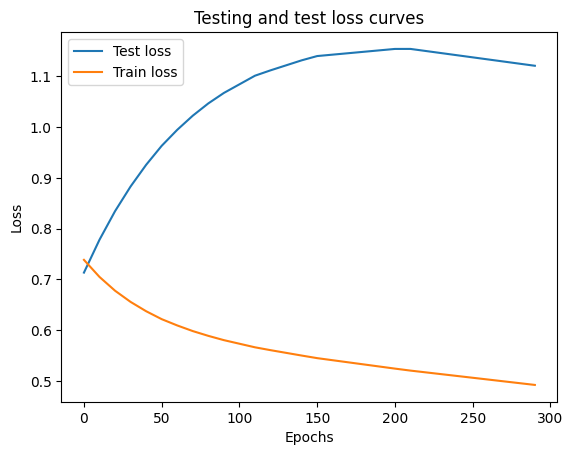

In [16]:
#Plot the loss curves
import numpy as np

plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.plot(epoch_count,loss_values,label="Train loss")
plt.title("Testing and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.plot

In [18]:
model.state_dict()

OrderedDict([('weights', tensor([-1.7201])), ('bias', tensor([1.3366]))])

In [19]:
with torch.inference_mode():
    y_preds_new = model(X_test)

In [20]:
plot_pred(predictions=y_preds)

NameError: ignored

In [ ]:
plot_pred(predictions=y_preds_new)

#Saving model in PyTorch
 1. `torch.save()` - allows to save a PyTorch object in Python's pickle format
 2. `torch.load()` - allows you load a saved PyTorch object
 3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
from pathlib import Path

# 1. Create models directory
Model_Path = Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)

# 2. create model save path
Model_name = "01_pytorch_workflow_model.pth"
Model_Save_path = Model_Path/Model_name

# 3. Save the model state dict
print(f"Saving model to : {Model_Save_path}")
torch.save(obj=model.state_dict(),f=Model_Save_path)

In [ ]:
#loading a model

loaded_model = LinearRegressionModel()
loaded_model.state_dict()

In [ ]:
loaded_model.load_state_dict(torch.load(f=Model_Save_path))

In [ ]:
loaded_model.state_dict(),model.state_dict()

#Putting Everything together

In [21]:
#import pytorch libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.0.1+cu118'

In [22]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


In [23]:
# Data
weight = 0.9
bias = 0.4

#create range values
start = 0
end = 1
step = 0.02

# create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4180],
         [0.4360],
         [0.4540],
         [0.4720],
         [0.4900],
         [0.5080],
         [0.5260],
         [0.5440],
         [0.5620]]))

In [24]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [25]:
#Building pytorch model
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)

#Set the manual seed when creating the model
torch.manual_seed(49)
model_1 = LinearRegressionModel2()
model_1, model_1.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.9062]])),
              ('linear_layer.bias', tensor([-0.4466]))]))

In [26]:
next(model_1.parameters()).device

device(type='cpu')

In [27]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#Training


In [29]:
#create loss function
loss_fn = nn.L1Loss()

#create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [31]:
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ## Training
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred,y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. step the optimizer
    optimizer.step()


    ## Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        #calculate the loss
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 100 == 0 :
        print(f"Epoch : {epoch} | Train loss : {loss} | Test loss : {test_loss}")

Epoch : 0 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 100 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 200 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 300 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 400 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 500 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 600 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 700 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 800 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635
Epoch : 900 | Train loss : 0.002549829427152872 | Test loss : 0.008392310701310635


In [35]:
from pprint import pprint
print("The model learned values are : ")
pprint(model_1.state_dict())
print()
print("Actual values are : ")
print(f"Weight : {weight}, Bias : {bias}")

The model learned values are : 
OrderedDict([('linear_layer.weight', tensor([[0.8949]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3994], device='cuda:0'))])

Actual values are : 
Weight : 0.9, Bias : 0.4


In [38]:
#Making predictions
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.1154],
        [1.1333],
        [1.1512],
        [1.1691],
        [1.1870],
        [1.2049],
        [1.2228],
        [1.2407],
        [1.2586],
        [1.2765]], device='cuda:0')

TypeError: ignored

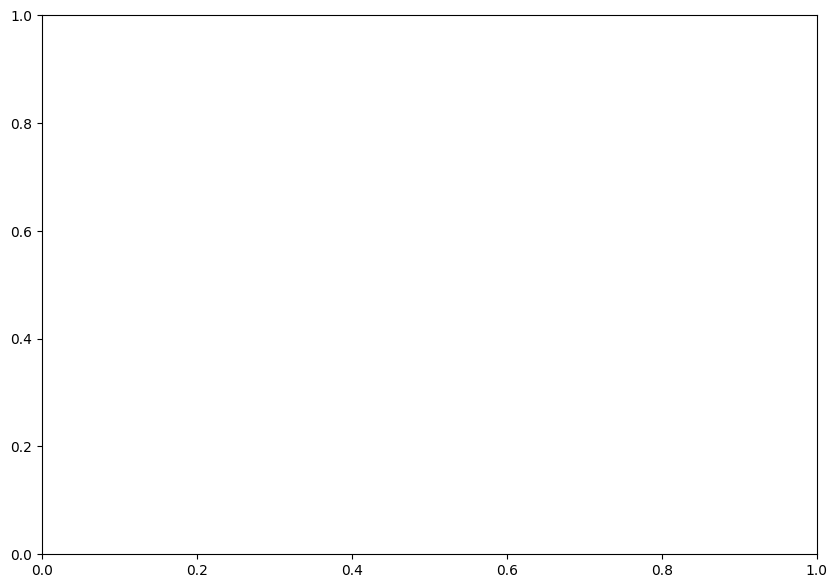

In [41]:
plot_pred(predictions=y_preds.cpu())

In [43]:
#Saving the model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_model_01.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_model_01.pt


In [44]:
# Loading into a fresh instance
loaded_model_1 = LinearRegressionModel2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model : \n{loaded_model_1}")
print(f"Model on device : \n{next(loaded_model_1.parameters()).device}")

Loaded model : 
LinearRegressionModel2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device : 
cuda:0


In [45]:
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')